In [27]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import json
import math
import matplotlib

In [23]:
with open('./scripts/data/preceding_stimuli/experiment_train_48.json') as json_file:
    experiment = json.load(json_file)

rPSTs = pkl.load(open('./scripts/data/output/rPSTs_48.pkl', 'rb'))

rNSTs = np.load('./scripts/data/output/rNSTs_48.txt.npy')
rNSTs[rNSTs == 'na'] = np.nan
rNSTs = rNSTs.astype(float)

In [21]:
experiment.keys()

dict_keys(['ind', 'sampled_spike', 'preceding_stimuli', 'preceding_spikes'])

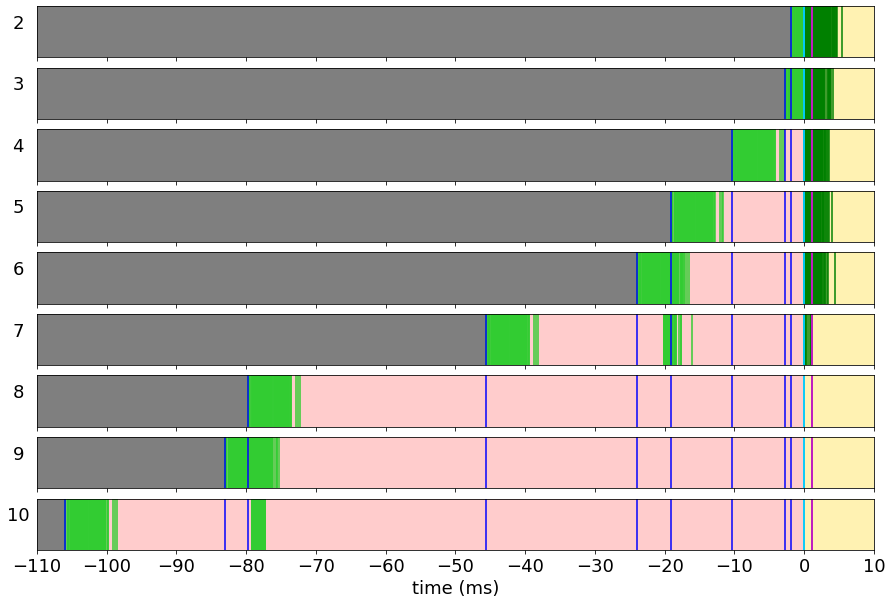

In [29]:
plt.rcParams.update({'font.size': 18})
def view_preceding_stims_walk(preceding_stims, resulting_NSTs, rPSTs, pivot):
    fig, axes = plt.subplots(len(preceding_stims) - 1,1, figsize = (15,10), sharex = True)

    # get the latest spike time to set the xlim
    latest_spike_time = np.nanmax(resulting_NSTs)

    for i in range(1, len(preceding_stims)):
        i_ax = i - 1
        # xlims
        left_buffer = 2
        axes[i_ax].set_xlim([math.floor(preceding_stims[0]) - left_buffer, latest_spike_time + 2])
        
        # uncertain history window
        left = preceding_stims[0] - left_buffer
        bottom = 0
        width = left_buffer + preceding_stims[len(preceding_stims) - 1 - i] - preceding_stims[0]
        height = 1
        axes[i_ax].add_patch(matplotlib.patches.Rectangle((left - 10,bottom), width + 10, height, color="black", alpha = 0.5)) # add anextra 10 buffer so there isn't any white space
        
        # certain history window
        left = left + width
        width = 0 - left
        axes[i_ax].add_patch(matplotlib.patches.Rectangle((left,bottom), width, height, color="red", alpha = 0.2))
        
        # output window
        left = left + width
        width = 100
        axes[i_ax].add_patch(matplotlib.patches.Rectangle((left,bottom), width, height, color="gold", alpha = 0.3))

        # output spikes
        axes[i_ax].vlines(resulting_NSTs[i,:], 0, 1, color = 'green')
        
        # pre-last-stimulus spikes
        axes[i_ax].vlines(rPSTs[i], 0, 1, color = 'limegreen')

        # stimuli
        axes[i_ax].vlines(preceding_stims[-i-1:], 0, 1, color = 'blue')
        axes[i_ax].vlines(preceding_stims[-i-1:][-1], 0, 1, color = 'cyan')

        # pivot spike
        axes[i_ax].vlines(pivot, 0, 1, color = 'fuchsia')

        # set axes ticks and such
        if i != len(preceding_stims) - 1:
            axes[i_ax].set_xticks([])
        else:
            axes[i_ax].set_xlabel('time (ms)')

        axes[i_ax].set_ylabel(str(i+1) + '     ', rotation = 0)
        axes[i_ax].set_yticks([])
        
        axes[i_ax].set_ylim(.1,.2)
    last_x_tick = math.floor(preceding_stims[0]/10)*10
    axes[-1].set_xticks(range(last_x_tick,20,10))
    plt.show()
    
    return

ind = 38
view_preceding_stims_walk(experiment['preceding_stimuli'], rNSTs, rPSTs, experiment['sampled_spike'])